# 第一章课后练习

## 表1.1中若只包含编号为1，4的两个样例，试给出相应的版本空间

色泽：{0：青绿， 1：*}，根蒂：{0：蜷缩， 1：*}，敲声：{0：浊响， 1：*}

n = 2 * 2 * 2 - 1 = 7

对应：[[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],]

[1,1,1]对应 * * *删除

##  与使用单个合取式来进行假设表示相比，使用“析合范式”将使得假设空间具有更强的表示能力。若使用最多包含k个合取式的析合范式来表达1.1的西瓜分类问题的假设空间，试估算有多少种可能的假设

搜过很多答案，个人层次不行，看不懂，太花时间了，放弃

**直接放答案**

- k  :1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
- 可能：48，931，10332，72358，342057，1141603，2773332，4971915，6543060，6175660，4003914，1676233，422676，422676，61884，5346，435，27，1

## 若数据包含噪声，则假设空间中可能不存在与所有训练样本都一致的假设。在此情形下，试设计一种归纳偏好用于假设选择

**相同数据但分类结果不同**：

- 删除这些数据
- 根据这些点周围的数据分类

## 本章1.4节在论述“没有免费的午餐”定理时，默认使用了“分类错误率”作为性能度量来对分类器进行评估。若换用其他性能度量l,试证明没有免费的午餐”定理仍成立

原式：$\sum_f \mathbb I (h\ne f) = \frac{1}{2} 2^{\mid\chi\mid}$

只需证明：$\sum_f l(h,f) = 常数$ 

已知： $l(0,0) = l(1,1),l(0,1) = l(1,0)$,相加

$l(0,0) + l(0,1) = l(1,1)+ l(1,0)$

即 $l(h=f)+l(h\ne f)=A$,

$\sum_f l(h,f)=\frac{1}{2}2^{\mid\chi\mid}[l(h=f)+l(h\ne f)]=\frac{1}{2} 2^{\mid\chi\mid}A$



## 试述机器学习在互联网搜索的哪些环节起什么作用

消息推送，网页相关度排行，以图搜图

# 第一周思考题

## 线性回归推导

$\hat{y} = x^T w$,

$E=\frac{1}{2}(\hat{y}-y)^2$,

$dw =\frac{\partial E}{\partial w}=\frac{\partial E}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w}=(\hat{y}-y)x^T$

$db =\frac{\partial E}{\partial b}=\hat{y}-y$

$w = w - \alpha dw$,

$b = b -\alpha db$

## 逻辑回归

$\hat{y} = \frac{1}{1+e^{-z}}$,

$z= x^T w$,

$ln\frac{y}{1-y}=z$,

$p(y\mid x)= \hat{y}^y (1-\hat{y})^{1-y}$

$E = -[ylog\hat{y}+(1-y)log(1-\hat{y})]$

$dw =\frac{\partial E}{\partial w}=\frac{\partial E}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial w}=-[\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}}][\hat{y}(1-\hat{y})][x^T]=(\hat{y}-y)x^T$

$db=\hat{y}-y$

$w = w - \alpha dw$,

$b = b -\alpha db$

## LDA：最大化类间，最小化类内

$max J =\frac{\mid\mid w^T\mu1-w^T\mu2\mid\mid^{2}_{2}}{\sum^{N}_{i=1,x\in c_i}w^T(x-\mu_i)(x-\mu_i)^Tw}$

令$S_b = (\mu1-\mu2)(\mu1-\mu2)^T$,$S_w=\sum^{N}_{i=1,x\in c_i}(x-\mu_i)(x-\mu_i)^T$

$max J = \frac{w^TS_bw}{w^TS_ww}$

$\frac{\partial J}{\partial w}=0$

$S_bw (w^TS_ww)- S_ww(w^TS_bw)=0$ ,

$S_bw = S_ww\frac{w^TS_bw}{w^TS_ww}$，

$J=\frac{w^TS_bw}{w^TS_ww}=\lambda$

$S_bw = \lambda S_ww$

$(S_w)^{-1}S_bw = \lambda w$

求J即求$(S_w)^{-1}S_b$最大特征值，$w$即对应的特征向量

$w=(S_w)^{-1}(\mu1-\mu2)$

对于高维情况下：$S_w$不变，此时$S_b=S_{全局}-S_w$

$S_b=\sum^{N}_{i=1}(x-\mu_总)(x-\mu_总)^T-\sum^{N}_{i=1,x\in c_i}(x-\mu_i)(x-\mu_i)^T=\sum^{N}_{i=1}m_i(\mu_i-\mu_总)(\mu_i-\mu_总)^T$

$max J = \frac{tr(w^TS_bw)}{tr(w^TS_ww)}$

## 多分类学习的拆分策略

**1对1**：
- 类别数N，要训练的分类器数量为$N(N-1)/2$
- 训练结果：类别占多数的结果

**1对其余**：
- 类别数N，要训练的分类器数量为$N$
- 训练结果：仅有一个分类器为正取对应标签；多个分类器为正去置信度大的分类

**多对多**：

- 编码：N个类别M次划分，M个分类器
- 解码：M个分类器，对测试数据预测，预测标记组成编码A,每个类别M个分类器的训练结果B
- 距离：选择合适距离尺度 衡量AB距离，如海明距离，欧氏距离

## 类别不平衡的解决方案

总结：过采样，欠采样，再缩放

**数据层面**：
- 收集更多缺少的数据，使用GAN扩充数据

**过采样**：

- SMOTE构造新的小类样本。基于距离计算两个小类的相似性，选择其中一个作基础样本，在邻近样本中随机选取一定数量的样本，对基础样本的某一属性加噪声。Borderline-SMOTE：只为那些周围大部分是大众样本的小众样本生成新样本。

- 聚类后过采样：大类样本聚类，训练L个分类器，每个分类器使用大类中的一个簇与所有的小类样本进行训练得到。投票给出结果

**欠采样**:

- boosting增量模型：递归地训练三个弱学习器，然后将这三个弱学习器结合形成一个强的学习器让L1输出始终为true，L2数据是50%L1预测正确和50%预测错误(这就是小类样本)的，因此L2样本均衡。L3的数据是L2判断为小类的样本.最终投票在L2和L3结果都是小类下，输出类别才是小类

- bagging模型融合：有放回地取出富有类样本，再和稀有类样本组合成新的训练集。训练N个模型，投票或求均值

**再缩放**：

- 损失函数增加小类样本的权值，降低大类样本的权值

- 特征选择：选择具有显著区分能力的特征进行训练

- One-class分类：只需检测某一特定类别，把小类样本作为异常点

- minibatch过程每个batch内保证类别平衡，均匀数据训练，不均匀数据在最后一层finetune

# 第三章课后练习

## 试分析在什么情况下，在以下式子中不比考虑偏置项b

$y= w^T x+b$

$y_1= w^T x_1+b$

$y_2= w^T x_2+b$

$y_2 - y_1= w^T (x_2-x_1)$,$y_3 - y_1= w^T (x_3-x_1)$,

...


每个样本都减去某一个样本，总样本数减一，但可以不考虑b

## 试证明，对于参数w，对率回归（logistics回归）的目标函数（式1）是非凸的，但其对数似然函数（式2）是凸的


$\hat{y} = \frac{1}{1+e^{-z}}$,

$z= x^T w$,

$dw =\frac{\partial y}{\partial w}=x\hat{y}(1-\hat{y})$

$(dw)^{,} =xx^Ty(y-1)(1-2y)$

$xx^T$半正定，$y(y-1)(1-2y)$半负定，结果为非凸

$(\frac{\partial l}{\partial \beta})'=xx^TP_1(1-P_1)$

$xx^T$半正定，$P_1(1-P_1)$正定，结果为凸


## 编程实现对率回归，并给出西瓜数据集3.0α上的结果

[[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]
 [0.666 0.091]
 [0.243 0.267]
 [0.245 0.057]
 [0.343 0.099]
 [0.639 0.161]
 [0.657 0.198]
 [0.36  0.37 ]
 [0.593 0.042]
 [0.719 0.103]]
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 1 1 0 0 1 1]
0.5
[[0.03826548 0.22867863]]
[-0.24509488]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


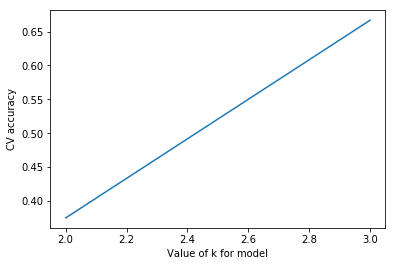

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pickle  # 第一种方法保存和加载模型需要的包
from sklearn.externals import joblib  # 使用sklearn自带的joblib包保存和加载模型
from sklearn.model_selection import cross_val_score  # 模型评估使用的的包
from sklearn.model_selection import train_test_split  # 数据集拆分
from sklearn.model_selection import learning_curve #学习曲线观察学习进度

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],[0.403,0.237],[0.481,0.149],[0.437,0.211],
           [0.666,0.091],[0.243,0.267],[0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],[0.593,0.042],[0.719,0.103]])
y=np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)  # 训练模型，X_train表示训练数据，y_train表示训练标签

print(model.predict(X_train))  # 打印模型预测结果
print(y_train)
print(model.score(X_test, y_test))
print(model.coef_)  # 打印y=ax+b中的a，模型的系数
print(model.intercept_)  # 打印b，模型的截距
print(model.get_params())  # 打印模型定义的参数
k_range=range(2,4)
k_score=[]
for k in k_range:
    scores=cross_val_score(model,X_test,y_test,cv=k,scoring='accuracy')
    k_score.append(scores.mean())
plt.figure()
plt.plot(k_range,k_score)
plt.xlabel('Value of k for model')
plt.ylabel('CV accuracy')
plt.show()


## 选择两个UCI数据集，比较10折交叉验证法和留一法所估计出的对率回归的错误率

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pickle  # 第一种方法保存和加载模型需要的包
from sklearn.externals import joblib  # 使用sklearn自带的joblib包保存和加载模型
from sklearn.model_selection import cross_val_score  # 模型评估使用的的包
from sklearn.model_selection import train_test_split  # 数据集拆分
from sklearn.model_selection import learning_curve #学习曲线观察学习进度

iris = datasets.load_iris()
X = iris.data
y = iris.target
#X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],[0.403,0.237],[0.481,0.149],[0.437,0.211],
#           [0.666,0.091],[0.243,0.267],[0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],[0.593,0.042],[0.719,0.103]])
#y=np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])
#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(solver="lbfgs",multi_class="auto")
model.fit(X_train, y_train)  # 训练模型，X_train表示训练数据，y_train表示训练标签

print(model.predict(X_train))  # 打印模型预测结果
print(y_train)
print(model.score(X_test, y_test))
#print(model.coef_)  # 打印y=ax+b中的a，模型的系数
#print(model.intercept_)  # 打印b，模型的截距
#print(model.get_params())  # 打印模型定义的参数
scores=cross_val_score(model,X_test,y_test,cv=10,scoring='accuracy')
print(scores.mean())

[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 1 0 1 2]
[1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
1.0
0.9833333333333334


## 编程实现线性判别分析，并给出西瓜数据集3.0α上的结果

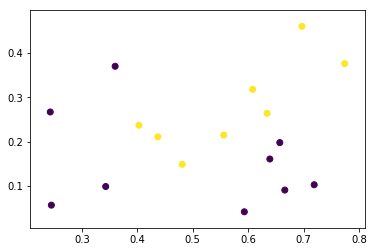

(17, 1)


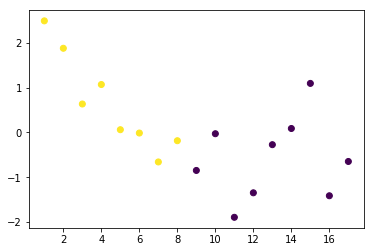

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X=np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],[0.403,0.237],[0.481,0.149],[0.437,0.211],
           [0.666,0.091],[0.243,0.267],[0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],[0.593,0.042],[0.719,0.103]])
y=np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])
plt.scatter(X[:, 0], X[:, 1],marker='o',c=y)
plt.show()
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_new = lda.transform(X)
k=range(1,18)
print(X_new.shape)
plt.scatter(k,X_new,marker='o',c=y)
plt.show()


## LDA仅在线性可分数据上能获得理想结果，试设计一个改进方法，使其能较好地用于非线性可分数据

引入核函数扩展LDA方法处理较为复杂的数据

## 令码长为9，类别数为4，试给出海明距离意义下理论最优的EOOC二元码并证明之

码长l为$2^n$时，至少可以使N=2n个类别的最优间隔，对于海明距离$2^{n-1}$

当n= 3 时l=8,有6个类别达到最优间隔 >4

所以这里只要在码长8后面再加一列即可


## EOOC编码能起到理想纠错作用的重要条件是：在每一位编码上出错的概率相当且独立。试析多分类任务经ECOC编码后产生的二类分类器满足该条件的可能性及由此产生的影响

如果某个位置出错的概率特别高，分类器失去作用，全0或全1

## 使用OvR和MvM将多分类任务分解为二分类任务求解时，试述为何无需专门针对类别不平衡性进行处理

每个类别做相同处理，不平衡会被抵消

## 试推出多分类代价敏感学习(仅考虑基于类别的错误分类代价)使用“再缩放”能获得理论最优解的条件

$\frac{y}{1-y}>\frac{m^{+}}{m^{-}}=\frac{cost^{-}}{cost^{+}}=\frac{(1-p)C_{12}}{pC_{21}}$

最优情况下，有$\frac{m^{+}}{m^{-}}=1$,$P_r=\frac{C_{12}}{C_{12}+C_{21}}$

正例：反例 = $C_{12}:C_{21}$

$\frac{y}{1-y}>\frac{P_0}{1-P_0}\frac{(1-p)}{p}$

多分类要满足任意两类$t_{ij}=\frac{C_{ij}}{C_{ji}}$
